In [1]:
import pandas as pd
import numpy as np
import re
import folium
import pymongo
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

In [2]:
cliente = pymongo.MongoClient()
cliente

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
database = cliente.companies

In [4]:
colect = database.companies

# ELIGIENDO CATEGORIA

In [5]:
select_category = list(colect.find({},{"_id":0, "name":1,"category_code":1,"founded_year":1, "deadpooled_year":1}))

In [6]:
category = pd.DataFrame(select_category)
category

,name,category_code,founded_year,deadpooled_year
0,Wetpaint,web,2005.0,1.0
1,AdventNet,enterprise,1996.0,2.0
2,Zoho,software,2005.0,3.0
3,Digg,news,2004.0,NaN
4,Facebook,social,2004.0,NaN
...,...,...,...,...
18796,Adhunk,advertising,2009.0,NaN
18797,AfterLogic,software,2002.0,NaN
18798,goBookmaker,web,NaN,NaN
18799,EnteGreat Solutions,software,NaN,NaN


In [7]:
#df[1].fillna(0, inplace=True)
category["founded_year"].fillna(0, inplace = True)
category["founded_year"] = category["founded_year"].astype(int)
category["deadpooled_year"].fillna(0, inplace = True)
category["deadpooled_year"] = category["deadpooled_year"].astype(int)
category

,name,category_code,founded_year,deadpooled_year
0,Wetpaint,web,2005,1
1,AdventNet,enterprise,1996,2
2,Zoho,software,2005,3
3,Digg,news,2004,0
4,Facebook,social,2004,0
...,...,...,...,...
18796,Adhunk,advertising,2009,0
18797,AfterLogic,software,2002,0
18798,goBookmaker,web,0,0
18799,EnteGreat Solutions,software,0,0


In [8]:
status = []
for i in range(len(category)):
    if category["deadpooled_year"][i] == 0:
        status.append("Activa")
    else:
        status.append("Muerta")

category["status"] = (status)

In [9]:
category

,name,category_code,founded_year,deadpooled_year,status
0,Wetpaint,web,2005,1,Muerta
1,AdventNet,enterprise,1996,2,Muerta
2,Zoho,software,2005,3,Muerta
3,Digg,news,2004,0,Activa
4,Facebook,social,2004,0,Activa
...,...,...,...,...,...
18796,Adhunk,advertising,2009,0,Activa
18797,AfterLogic,software,2002,0,Activa
18798,goBookmaker,web,0,0,Activa
18799,EnteGreat Solutions,software,0,0,Activa


In [10]:
barras = pd.crosstab(category["category_code"],category["status"])
barras

status,Activa,Muerta
category_code,,
advertising,892,36
analytics,66,0
automotive,8,1
biotech,355,18
cleantech,281,24
consulting,630,7
design,4,0
ecommerce,646,42
education,36,0


In [11]:
porcentaje_vivas = []
total_category = []
for i  in range(len(barras)): 
    total_category.append(barras["Muerta"][i]+barras["Activa"][i])
barras["Total de empresas"] = total_category
    

In [12]:
for i  in range(len(barras)):
    if barras["Muerta"][i] == 0:
        porcentaje_vivas.append(100)
    else:
        porcentaje_vivas.append((((barras["Total de empresas"][i]-barras["Muerta"][i])*100)/(barras["Total de empresas"][i])))

In [13]:
barras["Porcentaje de activas"] = porcentaje_vivas
barras.sort_values("Porcentaje de activas", ascending = False, inplace = True)
barras

status,Activa,Muerta,Total de empresas,Porcentaje de activas
category_code,,,,
messaging,30,0,30,100.000000
news,48,0,48,100.000000
nonprofit,4,0,4,100.000000
analytics,66,0,66,100.000000
manufacturing,19,0,19,100.000000
local,1,0,1,100.000000
photo_video,23,0,23,100.000000
hospitality,8,0,8,100.000000
health,23,0,23,100.000000


In [14]:
seleccion = barras[barras["Total de empresas"] >= 500]
selec_final = seleccion.drop("null", axis = 0)
selec_final

status,Activa,Muerta,Total de empresas,Porcentaje de activas
category_code,,,,
consulting,630,7,637,98.901099
enterprise,719,23,742,96.900270
other,953,33,986,96.653144
software,2634,102,2736,96.271930
advertising,892,36,928,96.120690
public_relations,506,27,533,94.934334
ecommerce,646,42,688,93.895349
network_hosting,582,44,626,92.971246
mobile,946,72,1018,92.927308


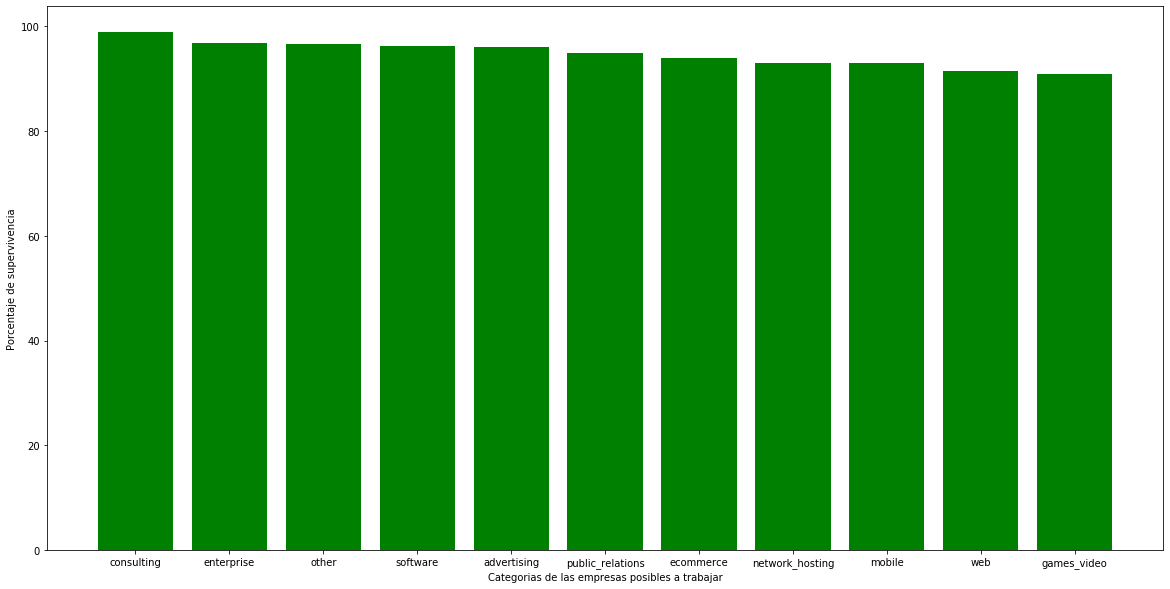

In [15]:
plt.figure(figsize =(20,10))
plt.bar(selec_final.index,selec_final["Porcentaje de activas"], linewidth = 4.0, color = 'g')
plt.xlabel("Categorias de las empresas posibles a trabajar")
plt.ylabel("Porcentaje de supervivencia")
plt.show();

# Elijo trabajar con la categoria de Consultoria.

### Para poder decidir sobre cual categoria podria invertir, realizamos un analisis de cada una segun la vida promedio de ellas, es decir historicamente cuanto han sobrevivido en el mercado. 

# ELIGIENDO COMPAÑIA

In [16]:
select_company = list(colect.find({"category_code":"consulting"},{"_id":0, "name":1, "tag_list":1,"founded_year":1, "deadpooled_year":1}))

In [17]:
select_company

[{'name': 'Compete',
  'founded_year': 2000,
  'deadpooled_year': nan,
  'tag_list': 'analytics, web-analytics, competitive-intelligence, market-research, business-intelligence, data, consumer-behavior-research'},
 {'name': 'Pivotal Labs',
  'founded_year': 1989,
  'deadpooled_year': nan,
  'tag_list': 'agile, rails, mobile, android, webos, iphone, ipad'},
 {'name': 'Accell Telesystems',
  'founded_year': 1982,
  'deadpooled_year': nan,
  'tag_list': 'accell'},
 {'name': 'Project10X',
  'founded_year': 2000,
  'deadpooled_year': nan,
  'tag_list': ''},
 {'name': 'Equifax',
  'founded_year': nan,
  'deadpooled_year': nan,
  'tag_list': 'null'},
 {'name': 'Astrails',
  'founded_year': 2005,
  'deadpooled_year': nan,
  'tag_list': ''},
 {'name': 'Forrester Research',
  'founded_year': 1983,
  'deadpooled_year': nan,
  'tag_list': ''},
 {'name': 'RiDE Group',
  'founded_year': 2004,
  'deadpooled_year': nan,
  'tag_list': 'web-design, resume-builder, computer-repair, video-receipes, nightl

In [18]:
recaudado = pd.DataFrame(select_company)

In [19]:
recaudado

,name,founded_year,deadpooled_year,tag_list
0,Compete,2000.0,NaN,"analytics, web-analytics, competitive-intellig..."
1,Pivotal Labs,1989.0,NaN,"agile, rails, mobile, android, webos, iphone, ..."
2,Accell Telesystems,1982.0,NaN,accell
3,Project10X,2000.0,NaN,
4,Equifax,NaN,NaN,null
...,...,...,...,...
632,Concise Data Management,NaN,NaN,null
633,Business and Technology Strategies,2007.0,NaN,"business-continuity-planning, disaaster-recove..."
634,atlanticOptimize,2009.0,NaN,"internet, marketing, seo, consulting, advertis..."
635,ITERNOVA,2004.0,NaN,"web, erp, crm, mobile, ecommerce, elearning, c..."


In [20]:
possible_company = []
for i in range(len(recaudado)):
    if "finance" in recaudado["tag_list"][i]:
        possible_company.append(recaudado["name"][i])

In [21]:
possible_company

['Willard John Thomas Associates',
 'Unstructured Ventures',
 'Legkokredit',
 'WJT Global Solutions',
 'Career Crown International',
 'USFINANCIALFREEDOM']

In [22]:
lista_final = list(colect.find({'$or':[{'name':'Willard John Thomas Associates'},
                       {'name':'Unstructured Ventures'},
                       {'name':'Legkokredit'},
                       {'name':'WJT Global Solutions'},
                       {'name':'USFINANCIALFREEDOM'},]},
              {"category_code":1,'name':1,"_id":0,"offices":1}))

In [23]:
companies = pd.DataFrame(lista_final)
companies

,name,category_code,offices
0,Willard John Thomas Associates,consulting,"[{'description': 'Latin America Office', 'addr..."
1,Unstructured Ventures,consulting,"[{'description': 'HQ', 'address1': '643 Magazi..."
2,Legkokredit,consulting,"[{'description': 'Moscow office', 'address1': ..."
3,WJT Global Solutions,consulting,"[{'description': 'Headquarters', 'address1': '..."
4,USFINANCIALFREEDOM,consulting,"[{'description': '', 'address1': '2942 N. 24th..."


In [24]:
lista_data = [json_normalize(i) for i in companies['offices']]

C:\Users\Tomaas\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


In [25]:
primer_registro = lista_data[0]
primer_registro

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude
0,Latin America Office,,,,Santiago,None,CHL,-33.425360,-70.566466
1,India Home Office,,,,Calcutta,None,IND,22.572646,88.363895
2,Research Office,,,,New Delhi,None,IND,28.635308,77.224960
3,Headquarters,14 Wall Street,,10005,New York,NY,USA,40.747270,-73.980064


In [26]:
primer_nombre = companies['name'][0]
primer_nombre

'Willard John Thomas Associates'

In [27]:
primer_registro['name'] = primer_nombre
primer_registro

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,name
0,Latin America Office,,,,Santiago,None,CHL,-33.425360,-70.566466,Willard John Thomas Associates
1,India Home Office,,,,Calcutta,None,IND,22.572646,88.363895,Willard John Thomas Associates
2,Research Office,,,,New Delhi,None,IND,28.635308,77.224960,Willard John Thomas Associates
3,Headquarters,14 Wall Street,,10005,New York,NY,USA,40.747270,-73.980064,Willard John Thomas Associates


In [28]:
lista_nombres =  list(companies['name'])
lista_nombres

['Willard John Thomas Associates',
 'Unstructured Ventures',
 'Legkokredit',
 'WJT Global Solutions',
 'USFINANCIALFREEDOM']

In [29]:
print(len(lista_nombres), len(lista_data))

5 5


In [30]:
zip_nombre_df = list(zip(lista_nombres,lista_data))

In [31]:
zip_nombre_df[0][1]

,description,address1,address2,zip_code,city,state_code,country_code,latitude,longitude,name
0,Latin America Office,,,,Santiago,None,CHL,-33.425360,-70.566466,Willard John Thomas Associates
1,India Home Office,,,,Calcutta,None,IND,22.572646,88.363895,Willard John Thomas Associates
2,Research Office,,,,New Delhi,None,IND,28.635308,77.224960,Willard John Thomas Associates
3,Headquarters,14 Wall Street,,10005,New York,NY,USA,40.747270,-73.980064,Willard John Thomas Associates


In [32]:
for i,item in enumerate(lista_data):
    item["company_name"] = companies["name"][i]

In [33]:
long_lat_df = [i[['latitude','longitude','company_name']] for i in lista_data]

In [34]:
long_lat_df[0]

,latitude,longitude,company_name
0,-33.425360,-70.566466,Willard John Thomas Associates
1,22.572646,88.363895,Willard John Thomas Associates
2,28.635308,77.224960,Willard John Thomas Associates
3,40.747270,-73.980064,Willard John Thomas Associates


In [35]:
concat_df = pd.DataFrame()

In [36]:
pd.concat([long_lat_df[0],long_lat_df[1]])

,latitude,longitude,company_name
0,-33.425360,-70.566466,Willard John Thomas Associates
1,22.572646,88.363895,Willard John Thomas Associates
2,28.635308,77.224960,Willard John Thomas Associates
3,40.747270,-73.980064,Willard John Thomas Associates
0,NaN,NaN,Unstructured Ventures


In [37]:
for i in range(len(long_lat_df)):
    concat_df  = pd.concat([concat_df,long_lat_df[i]])

In [38]:
concat_df.dropna(inplace = True)

In [39]:
concat_df

,latitude,longitude,company_name
0,-33.425360,-70.566466,Willard John Thomas Associates
1,22.572646,88.363895,Willard John Thomas Associates
2,28.635308,77.224960,Willard John Thomas Associates
3,40.747270,-73.980064,Willard John Thomas Associates
0,40.749310,-73.821321,WJT Global Solutions
1,-33.425360,-70.566466,WJT Global Solutions
2,22.572646,88.363895,WJT Global Solutions
3,31.224353,121.475916,WJT Global Solutions
4,28.635308,77.224960,WJT Global Solutions
0,33.481820,-112.030810,USFINANCIALFREEDOM


In [40]:
mapa_l = folium.Map(location=[39.38, -97.92], min_lat= 30, max_lat=120, min_lon=30, max_lon=120,
                    max_bounds=True)

In [41]:
concat_df.reset_index(inplace = True)

In [42]:
concat_df.drop('index',inplace = True, axis = 1)

In [43]:
for i in range(len(concat_df)):
    folium.Marker([concat_df.loc[i,'latitude'], concat_df.loc[i,'longitude']], 
                  tooltip = concat_df.loc[i,'company_name'], popup=  concat_df.loc[i,'company_name']).add_to(mapa_l)
mapa_l

In [44]:
mapa_l.save('mapa_continuo.html')

# Se observa en el mapa, que las startup financieras comienzan en Occidente, por sus altas tasas de crecimiento, y con base en su éxito abren oficina en Asia oriental, donde la economía esta en crecimiento, se observa que una vez instalada una startup occidental se crean mas startups siguiendo el modelo "occidental".